In [1]:
%load_ext autoreload
%autoreload 2

%load_ext autotime

%cd ..

/Users/rubenbroekx/Documents/Projects/edbscan
time: 1.48 ms (started: 2021-12-13 09:40:40 +01:00)


# Comparison - Scikit-Learn

This notebook evaluates the performance of the [EDBSCAN](https://github.com/RubenPants/EDBSCAN) algorithm on the default Scikit-Learn clustering benchmark datasets from the  [scikit-learn documentation](https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html#sphx-glr-auto-examples-cluster-plot-cluster-comparison-py).

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from pathlib import Path
from edbscan import EDBSCAN, edbscan

time: 831 ms (started: 2021-12-13 09:40:41 +01:00)


In [3]:
# Specify the color scheme
COLORS = {
    None: 'tab:blue',
    -1: 'tab:blue',
    0: 'tab:orange',
    1: 'tab:green',
    2: 'tab:red',
    3: 'tab:purple',
    4: 'tab:brown',
    5: 'tab:pink',
    6: 'tab:gray',
    7: 'tab:olive',
    8: 'tab:cyan',
}

time: 628 µs (started: 2021-12-13 09:40:42 +01:00)


In [4]:
def analyse(tag:str, eps:float=.2, min_samples:int=5) -> None:
    """Analyse the given cluster dataset, as specified by the tag."""
    # Get the data
    with open(Path.cwd() / f'examples/data/{tag}_X.npy', 'rb') as f:
        data = np.load(f,allow_pickle=True)
    with open(Path.cwd() / f'examples/data/{tag}_y.npy', 'rb') as f:
        y = np.load(f,allow_pickle=True)
    
    # Perform clustering
    _, labels = edbscan(eps=eps, min_samples=min_samples, X=data, y=y)
    
    # Show the input
    fig, ax = plt.subplots(1,2, figsize=(12,6))
    for label in [None,] + sorted({x for x in y if x is not None}):
        ax[0].scatter(
            data[y==label,0],
            data[y==label,1], 
            label=label,
            alpha=0.1 if label == None else 1,
            color=COLORS[label],
        )
    ax[0].set_title("Known data")
    ax[0].set_xticks([])
    ax[0].set_yticks([])

    # Show the predicted clusters
    for label in sorted(set(labels)):
        ax[1].scatter(
            data[labels==label,0], 
            data[labels==label,1], 
            label=label, 
            alpha=0.1 if label == -1 else 1,
            color=COLORS[label],
        )
    ax[1].set_title("Clusters")
    ax[1].set_xticks([])
    ax[1].set_yticks([])

    plt.show()

time: 1.99 ms (started: 2021-12-13 09:41:12 +01:00)


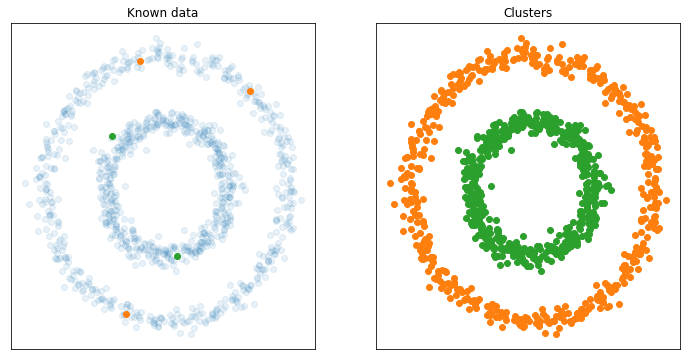

time: 152 ms (started: 2021-12-13 09:41:14 +01:00)


In [5]:
# Result as expected, similar to DBSCAN
analyse('circles')

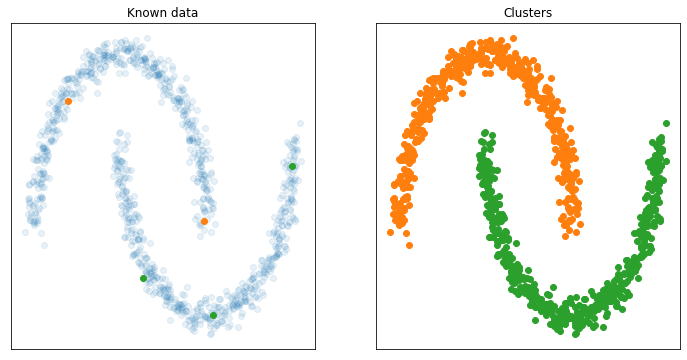

time: 132 ms (started: 2021-12-13 09:41:15 +01:00)


In [6]:
# Result as expected, similar to DBSCAN
analyse('moons')

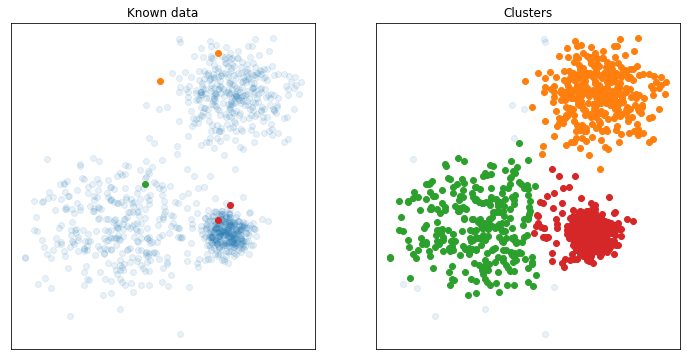

time: 149 ms (started: 2021-12-13 09:41:15 +01:00)


In [7]:
# Result as expected, similar to HDBSCAN
#  Note: DBSCAN would combine clusters
analyse('blobs', eps=1.)

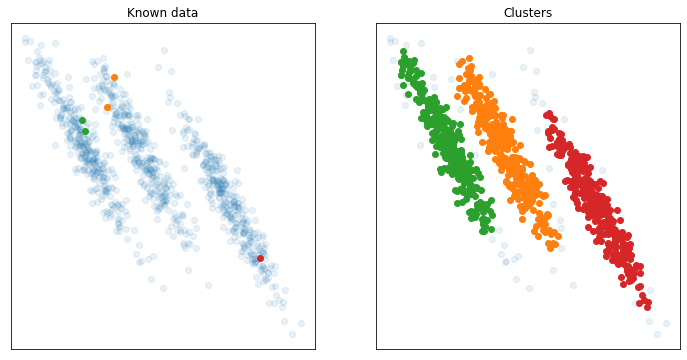

time: 142 ms (started: 2021-12-13 09:41:16 +01:00)


In [8]:
# Result as expected, similary to HDBSCAN
#  Note: DBSCAN would combine clusters
#  Note: Sides (now seen as outliers) can be included when increasing epsilon
analyse('aniso', eps=.3)

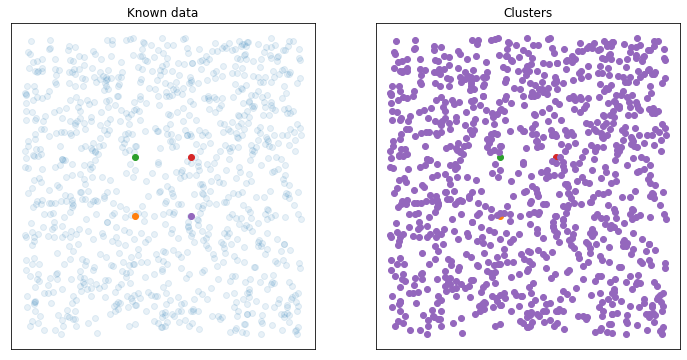

time: 188 ms (started: 2021-12-13 09:41:17 +01:00)


In [9]:
# Result NOT as expected, but still similar to DBSCAN and HDBSCAN
#  Note: one cluster dominates whole area
#  Note: annotated points still left as-is
analyse('uniform')